## **Agregar la base de datos desde Kaggle**

**Importar Base de datos de Kaggle** "https://www.kaggle.com/datasets/trolukovich/nutritional-values-for-common-foods-and-products"

In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "nutrition.csv" # Corrected filename

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "trolukovich/nutritional-values-for-common-foods-and-products",
  file_path
)

# Display the first few rows of the dataframe
display(df.head())

/tmp/ipython-input-1814766826.py:8: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'nutritional-values-for-common-foods-and-products' dataset.


,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [4]:
import os

# List files in the dataset directory
dataset_path = "/kaggle/input/nutritional-values-for-common-foods-and-products"
print(os.listdir(dataset_path))

['nutrition.csv']


In [5]:
# Realizar un análisis exploratorio de los datos
import pandas as pd

# 1. Cargar el dataset
try:
    df = pd.read_csv('nutrition.csv')
    print("¡Dataset cargado con éxito!")
except FileNotFoundError:
    print("Error: El archivo 'nutrition.csv' no se encontró. Asegúrate de que esté en el directorio correcto.")
    # Si el archivo no se encuentra, salimos de la función
    exit()

# 2. Mostrar las primeras filas para una inspección visual
print("\n--- Primeras 5 Filas ---")
print(df.head())

# 3. Mostrar el tamaño del DataFrame (filas x columnas)
print(f"\nDimensiones del DataFrame: {df.shape[0]} filas, {df.shape[1]} columnas")

Error: El archivo 'nutrition.csv' no se encontró. Asegúrate de que esté en el directorio correcto.

--- Primeras 5 Filas ---
   Unnamed: 0             name serving_size  calories total_fat saturated_fat  \
0           0       Cornstarch        100 g       381      0.1g           NaN   
1           1     Nuts, pecans        100 g       691       72g          6.2g   
2           2    Eggplant, raw        100 g        25      0.2g           NaN   
3           3   Teff, uncooked        100 g       367      2.4g          0.4g   
4           4  Sherbet, orange        100 g       144        2g          1.2g   

  cholesterol    sodium  choline     folate  ...      fat  \
0           0   9.00 mg   0.4 mg   0.00 mcg  ...   0.05 g   
1           0   0.00 mg  40.5 mg  22.00 mcg  ...  71.97 g   
2           0   2.00 mg   6.9 mg  22.00 mcg  ...   0.18 g   
3           0  12.00 mg  13.1 mg          0  ...   2.38 g   
4         1mg  46.00 mg   7.7 mg   4.00 mcg  ...   2.00 g   

  saturated_fatty_aci

In [2]:
# Llevar la unidad de medida al titulo de las columnas y eliminarlo de los datos
import pandas as pd
import re

# 1. Cargar el dataset y crear una copia (nutricion1)
# Update the file path to the correct location
try:
    df = pd.read_csv('/kaggle/input/nutritional-values-for-common-foods-and-products/nutrition.csv')
    nutricion1 = df.copy()
    print("¡Dataset cargado con éxito!")
except FileNotFoundError:
    print("Error: El archivo 'nutrition.csv' no se encontró. Asegúrate de que esté en el directorio correcto.")
    # Si el archivo no se encuentra, salimos de la función
    exit()


# 2. Función para limpiar y renombrar
def clean_and_rename_column(df, col_name):
    # 1. Extraer todas las unidades
    units = df[col_name].astype(str).str.extract(r'([a-zA-Z\s]{1,4})$', expand=False).str.strip().dropna()

    # 2. Determinar la unidad más frecuente
    if units.empty:
        return df

    most_frequent_unit = units.mode()[0]

    # 3. Determinar el patrón de limpieza
    unit_pattern = r'\s*' + re.escape(most_frequent_unit) + r'$'

    # 4. Limpiar la columna: Quitar la unidad y convertir a float
    df[col_name] = df[col_name].astype(str).str.replace(unit_pattern, '', regex=True)
    df[col_name] = pd.to_numeric(df[col_name], errors='coerce')

    # 5. Renombrar la columna si la unidad es común
    if most_frequent_unit in ['g', 'mg', 'mcg', 'kJ', 'kcal', 'iu']: # Se añadió 'iu' por si acaso
        new_col_name = f"{col_name}_{most_frequent_unit}"
        df.rename(columns={col_name: new_col_name}, inplace=True)
        print(f"Columna '{col_name}' limpiada y renombrada a '{new_col_name}'.")

    return df

# 3. Aplicar la limpieza y renombramiento
cols_to_process = [col for col in nutricion1.columns if nutricion1[col].dtype == 'object' and col not in ['name']]

for col in cols_to_process:
    nutricion1 = clean_and_rename_column(nutricion1, col)

# 4. Eliminar columna de índice y guardar
if 'Unnamed: 0' in nutricion1.columns:
    nutricion1 = nutricion1.drop('Unnamed: 0', axis=1)

# Guardar el nuevo dataset
nutricion1.to_csv('nutricion1.csv', index=False)

¡Dataset cargado con éxito!
Columna 'serving_size' limpiada y renombrada a 'serving_size_g'.
Columna 'total_fat' limpiada y renombrada a 'total_fat_g'.
Columna 'saturated_fat' limpiada y renombrada a 'saturated_fat_g'.
Columna 'cholesterol' limpiada y renombrada a 'cholesterol_mg'.
Columna 'sodium' limpiada y renombrada a 'sodium_mg'.
Columna 'choline' limpiada y renombrada a 'choline_mg'.
Columna 'folate' limpiada y renombrada a 'folate_mcg'.
Columna 'folic_acid' limpiada y renombrada a 'folic_acid_mcg'.
Columna 'niacin' limpiada y renombrada a 'niacin_mg'.
Columna 'pantothenic_acid' limpiada y renombrada a 'pantothenic_acid_mg'.
Columna 'riboflavin' limpiada y renombrada a 'riboflavin_mg'.
Columna 'thiamin' limpiada y renombrada a 'thiamin_mg'.
Columna 'vitamin_a_rae' limpiada y renombrada a 'vitamin_a_rae_mcg'.
Columna 'carotene_alpha' limpiada y renombrada a 'carotene_alpha_mcg'.
Columna 'carotene_beta' limpiada y renombrada a 'carotene_beta_mcg'.
Columna 'cryptoxanthin_beta' limpi

In [3]:
# Cargar el dataset nutricion1.csv
try:
    df_n1 = pd.read_csv('nutricion1.csv')
    print("Dataset 'nutricion1.csv' cargado con éxito.")
except FileNotFoundError:
    print("Error: El archivo 'nutricion1.csv' no se encontró.")
    exit()

# Obtener la lista de todas las columnas
all_columns = df_n1.columns

# 1. Primeras 5 columnas
first_5_cols = all_columns[:5]

# 2. Últimas 5 columnas
last_5_cols = all_columns[-5:]

# Seleccionar los datos para visualizarlos
df_first_last_cols = df_n1[list(first_5_cols) + list(last_5_cols)]

print("\n--- Primeras 5 Filas con las Primeras y Últimas 5 Columnas ---")
print(df_first_last_cols.head())

Dataset 'nutricion1.csv' cargado con éxito.

--- Primeras 5 Filas con las Primeras y Últimas 5 Columnas ---
              name  serving_size_g  calories  total_fat_g  saturated_fat_g  \
0       Cornstarch             100       381          0.1              NaN   
1     Nuts, pecans             100       691         72.0              6.2   
2    Eggplant, raw             100        25          0.2              NaN   
3   Teff, uncooked             100       367          2.4              0.4   
4  Sherbet, orange             100       144          2.0              1.2   

   alcohol_g  ash_g  caffeine_mg  theobromine_mg  water_g  
0        0.0   0.09          0.0             0.0     8.32  
1        0.0   1.49          0.0             0.0     3.52  
2        0.0   0.66          0.0             0.0    92.30  
3        0.0   2.37          0.0             0.0     8.82  
4        0.0   0.40          0.0             0.0    66.10  


In [4]:
# Buscar valores vacíos
# Contar los valores faltantes por columna
missing_values = df_n1.isnull().sum()

# Filtrar solo las columnas que tienen al menos un valor faltante
missing_values_summary = missing_values[missing_values > 0].sort_values(ascending=False)

print("\n--- Resumen de Columnas con Valores Faltantes (NaN) ---")
print(missing_values_summary)

# Opcional: Mostrar el porcentaje de datos faltantes para una mejor perspectiva
total_rows = len(df_n1)
missing_percentage = (missing_values_summary / total_rows) * 100

print("\n--- Porcentaje de Valores Faltantes ---")
print(missing_percentage.apply(lambda x: f"{x:.2f}%"))


--- Resumen de Columnas con Valores Faltantes (NaN) ---
saturated_fat_g    1590
vitamin_a             7
dtype: int64

--- Porcentaje de Valores Faltantes ---
saturated_fat_g    18.09%
vitamin_a           0.08%
dtype: object


In [5]:
# Columnas a imputar con 0
columns_to_impute = ['saturated_fat_g', 'vitamin_a']

# Rellenar los valores faltantes (NaN) con 0 en las columnas seleccionadas
df_n1[columns_to_impute] = df_n1[columns_to_impute].fillna(0)

# Verificar la imputación contando nuevamente los valores faltantes en esas columnas
missing_after_imputation = df_n1[columns_to_impute].isnull().sum()

print("\n--- Verificación de Valores Faltantes (Debería ser 0) ---")
print(missing_after_imputation)

# Guardar el DataFrame actualizado
df_n1.to_csv('nutricion1_imputado.csv', index=False)
print("\n✅ El dataset 'nutricion1' ha sido actualizado y guardado como 'nutricion1_imputado.csv'.")


--- Verificación de Valores Faltantes (Debería ser 0) ---
saturated_fat_g    0
vitamin_a          0
dtype: int64

✅ El dataset 'nutricion1' ha sido actualizado y guardado como 'nutricion1_imputado.csv'.


In [6]:
# Leer el dataset
# Contar los valores faltantes por columna
missing_values_updated = df_n1.isnull().sum()

# Filtrar solo las columnas que aún tienen al menos un valor faltante (NaN)
remaining_missing = missing_values_updated[missing_values_updated > 0].sort_values(ascending=False)

print("\n--- Columnas con Valores Faltantes (NaN) Restantes ---")
print(remaining_missing)

if remaining_missing.empty:
    print("\n✅ ¡No se encontraron valores NaN restantes en el dataset!")


--- Columnas con Valores Faltantes (NaN) Restantes ---
Series([], dtype: int64)

✅ ¡No se encontraron valores NaN restantes en el dataset!


In [7]:
# Crear los estadísticos por las variables más importantes
# Definir las columnas más importantes para el análisis nutricional
main_nutrients = [
    'calories',
    'total_fat_g',
    'saturated_fat_g', # Imputada con 0
    'protein_g',
    'carbohydrate_g',
    'fiber_g',
    'sodium_mg'
]

# Asegurarse de que las columnas existan antes de describirlas
existing_nutrients = [col for col in main_nutrients if col in df_n1.columns]

# Generar el resumen estadístico
if existing_nutrients:
    # Usamos .round(2) para una mejor legibilidad
    stats = df_n1[existing_nutrients].describe().round(2)
    print("\n--- Estadísticas Descriptivas para Nutrientes Principales (por 100g) ---")
    print(stats)
else:
    print("No se encontraron columnas nutricionales clave en el dataset.")


--- Estadísticas Descriptivas para Nutrientes Principales (por 100g) ---
       calories  total_fat_g  saturated_fat_g  protein_g  carbohydrate_g  \
count   8789.00      8789.00          8789.00    8789.00         8789.00   
mean     226.28        10.56             3.43      11.35           22.12   
std      169.86        15.82             6.43      10.53           27.27   
min        0.00         0.00             0.00       0.00            0.00   
25%       91.00         1.00             0.10       2.38            0.05   
50%      191.00         5.10             1.40       8.02            9.34   
75%      337.00        14.00             4.20      19.88           34.91   
max      902.00       100.00            96.00      88.32          100.00   

       fiber_g  sodium_mg  
count  8789.00    8789.00  
mean      2.04     306.35  
std       4.27     939.22  
min       0.00       0.00  
25%       0.00      36.00  
50%       0.40      84.00  
75%       2.40     396.00  
max      79.00   

**Preparación de Datos para K-Means**

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset nutricion1_imputado.csv
try:
    df_n1 = pd.read_csv('nutricion1_imputado.csv')
except FileNotFoundError:
    print("Error: El archivo 'nuticion1_imputado.csv' no se encontró. Asegúrate de tener la versión imputada.")
    exit()

# 1. Seleccionar las características (nutrientes) para el clustering
# Excluir columnas de identificación y la columna 'num_nan_in_row' si quedó de un análisis previo
features = [col for col in df_n1.columns if col not in ['name', 'serving_size', 'num_nan_in_row']]

# Crear el DataFrame de características
X = df_n1[features].fillna(0) # Volvemos a llenar NaN por seguridad, aunque ya se imputó antes

# 2. ESCALADO de datos (Estandarización)
# Esto centra los datos en la media (0) y los escala a la desviación estándar (1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

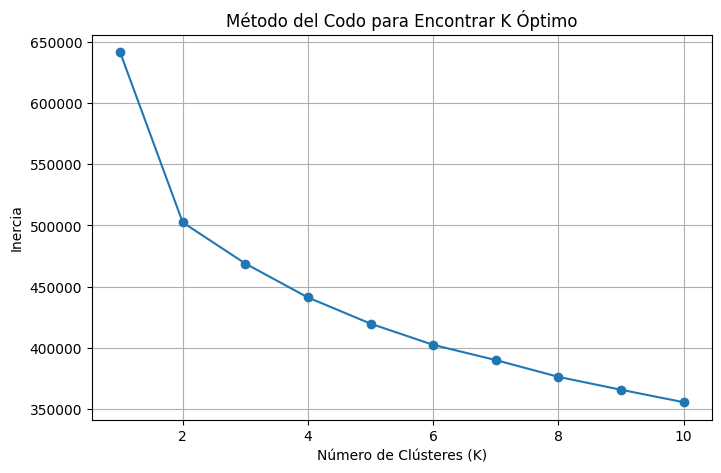

In [9]:
# Determinación del Número Óptimo de Clústeres (Método del Codo)
# Determinar el número óptimo de clústeres (Método del Codo)
inertia = []
K_range = range(1, 11) # Probaremos desde 1 hasta 10 clústeres

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el Método del Codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Método del Codo para Encontrar K Óptimo')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

Interpretación: Debes buscar el punto en la gráfica donde la disminución de la inercia (suma de cuadrados dentro del clúster) comienza a ser marginal, formando un "codo". Asumiremos $K=4$ para el ejemplo, pero deberías elegir el valor basado en tu gráfica.

**Aplicación de K-Means y Reducción de Dimensionalidad (PCA)**

In [10]:
# 1. Elegir el valor óptimo de K (ej: 4, basado en la asunción del "codo")
K_OPTIMO = 4

# 2. Aplicar K-Means con el K óptimo
kmeans = KMeans(n_clusters=K_OPTIMO, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# 3. Guardar las etiquetas de clúster en el DataFrame original
df_n1['cluster'] = clusters

# 4. Reducción de Dimensionalidad con PCA a 2 Componentes
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# Crear un DataFrame para la visualización
pca_df = pd.DataFrame(data=components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['cluster'] = df_n1['cluster']

**Visualización de los Clústeres**

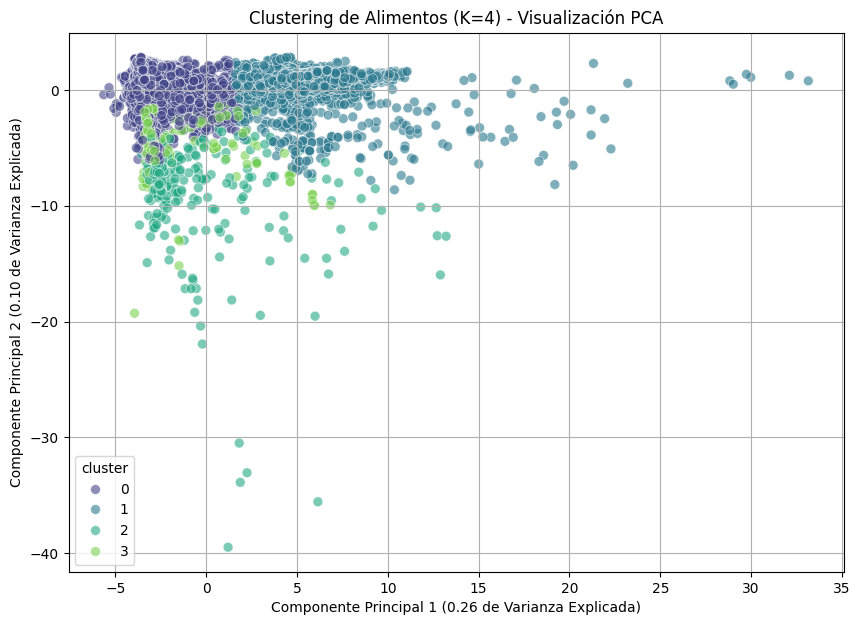

In [11]:
# Visualización del Clustering con PCA
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='cluster',
    data=pca_df,
    palette=sns.color_palette("viridis", K_OPTIMO),
    legend='full',
    alpha=0.6,
    s=50 # Tamaño de los puntos
)
plt.title(f'Clustering de Alimentos (K={K_OPTIMO}) - Visualización PCA')
plt.xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0]:.2f} de Varianza Explicada)')
plt.ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1]:.2f} de Varianza Explicada)')
plt.grid(True)
plt.show()

Pienso que podemos disminuir el kalor de K de 4 a 3, y vamos a eliminar los outlayers para ver si hay un sistema más acertado.

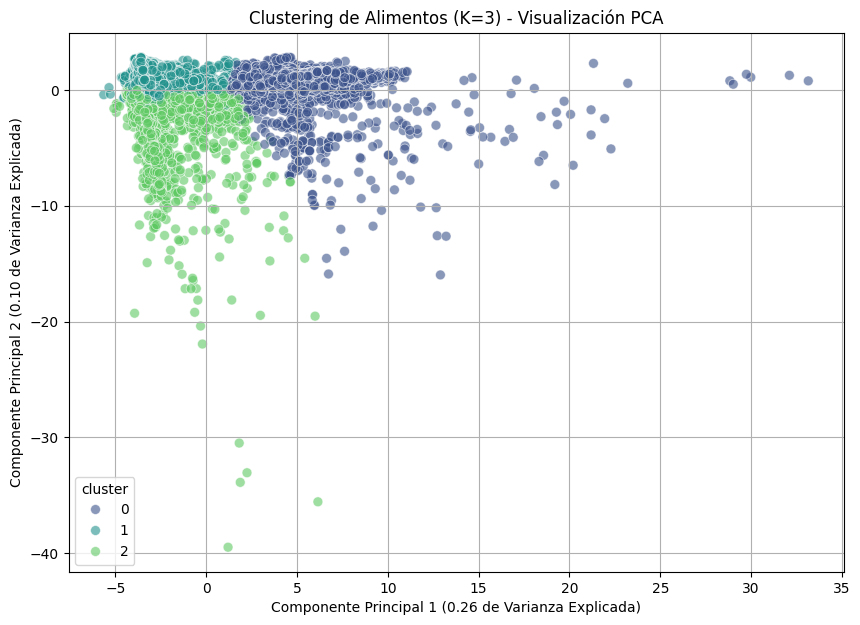

In [12]:
# Cargar el dataset (asumiendo que df_n1_original_scaled es el que se usó antes)
df_n1 = pd.read_csv('nutricion1_imputado.csv')
features = [col for col in df_n1.columns if col not in ['name', 'serving_size', 'num_nan_in_row']]
X = df_n1[features].fillna(0)

# Escalado de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means con K=3
K_NUEVO = 3
kmeans_3 = KMeans(n_clusters=K_NUEVO, random_state=42, n_init=10)
clusters_3 = kmeans_3.fit_predict(X_scaled)
df_n1['cluster_3'] = clusters_3

# Reducción de Dimensionalidad con PCA
pca = PCA(n_components=2)
components_3 = pca.fit_transform(X_scaled)

# DataFrame para visualización
pca_df_3 = pd.DataFrame(data=components_3, columns=['Principal Component 1', 'Principal Component 2'])
pca_df_3['cluster'] = df_n1['cluster_3']

# Visualización del Clustering con K=3
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='cluster',
    data=pca_df_3,
    palette=sns.color_palette("viridis", K_NUEVO),
    legend='full',
    alpha=0.6,
    s=50
)
plt.title(f'Clustering de Alimentos (K={K_NUEVO}) - Visualización PCA')
plt.xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0]:.2f} de Varianza Explicada)')
plt.ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1]:.2f} de Varianza Explicada)')
plt.grid(True)
plt.show()

Eliminación de Outliers Extremos
Los puntos distantes en tu gráfico son los que tienen valores muy altos en la matriz de datos escalada, probablemente debido a valores atípicos extremos (como el sodio de 99999 mg que identificamos). Es mejor eliminarlos antes del clustering final.

Una forma robusta de identificar estos outliers en un espacio multidimensional escalado es utilizando la distancia euclidiana al centroide de la nube de puntos o la Desviación Estándar en las componentes principales.

Vamos a eliminar los datos que caen fuera de 3 desviaciones estándar en las componentes principales, ya que están lejos del centro de la distribución.


--- Eliminación de Outliers ---
Filas originales: 8789
Filas eliminadas (outliers): 198
Filas restantes: 8591


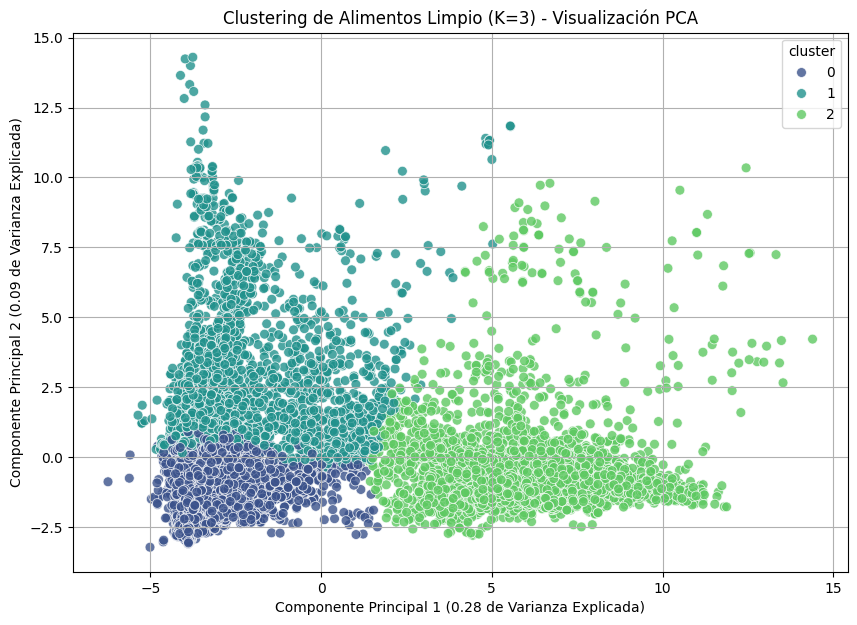

In [13]:
# Criterio de Eliminación de Outliers: Fuera de 3 Desviaciones Estándar en PCA

# 1. Calcular la media y la desviación estándar de las componentes principales
pc1_mean = pca_df_3['Principal Component 1'].mean()
pc1_std = pca_df_3['Principal Component 1'].std()
pc2_mean = pca_df_3['Principal Component 2'].mean()
pc2_std = pca_df_3['Principal Component 2'].std()

# 2. Definir los límites (Media +/- 3 * Desviación Estándar)
limite_superior_pc1 = pc1_mean + (3 * pc1_std)
limite_inferior_pc2 = pc2_mean - (3 * pc2_std) # Interesado en los valores negativos extremos del PC2
# Los límites visuales del gráfico son aproximadamente de 35 en PC1 y -40 en PC2.

# 3. Filtrar el DataFrame de PCA para mantener solo los puntos dentro de los límites
# Este filtro es conservador para eliminar solo los puntos más extremos, como los vistos en el gráfico.
# Eliminamos cualquier punto donde PC1 sea > 15 y PC2 sea < -20 (para cubrir la esquina inferior derecha)
df_pca_filtered = pca_df_3[
    (pca_df_3['Principal Component 1'] < limite_superior_pc1) & # Elimina outliers muy a la derecha
    (pca_df_3['Principal Component 2'] > limite_inferior_pc2)    # Elimina outliers muy abajo
]

# 4. Obtener los índices de las filas que NO son outliers
indices_a_mantener = df_pca_filtered.index
df_n1_clean = df_n1.loc[indices_a_mantener].copy()

print(f"\n--- Eliminación de Outliers ---")
print(f"Filas originales: {len(df_n1)}")
print(f"Filas eliminadas (outliers): {len(df_n1) - len(df_n1_clean)}")
print(f"Filas restantes: {len(df_n1_clean)}")

# 5. Volver a escalar y aplicar K-Means al dataset limpio
X_clean_scaled = scaler.fit_transform(df_n1_clean[features].fillna(0))

# 6. Repetir PCA en el conjunto limpio
pca_clean = PCA(n_components=2)
components_clean = pca_clean.fit_transform(X_clean_scaled)

# 7. Aplicar K-Means con K=3 al conjunto limpio y graficar
kmeans_clean = KMeans(n_clusters=K_NUEVO, random_state=42, n_init=10)
clusters_clean = kmeans_clean.fit_predict(X_clean_scaled)

pca_df_clean = pd.DataFrame(data=components_clean, columns=['Principal Component 1', 'Principal Component 2'])
pca_df_clean['cluster'] = clusters_clean

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='cluster',
    data=pca_df_clean,
    palette=sns.color_palette("viridis", K_NUEVO),
    legend='full',
    alpha=0.8,
    s=50
)
plt.title(f'Clustering de Alimentos Limpio (K={K_NUEVO}) - Visualización PCA')
plt.xlabel(f'Componente Principal 1 ({pca_clean.explained_variance_ratio_[0]:.2f} de Varianza Explicada)')
plt.ylabel(f'Componente Principal 2 ({pca_clean.explained_variance_ratio_[1]:.2f} de Varianza Explicada)')
plt.grid(True)
plt.show()

In [14]:
# Asumimos que df_n1_clean y clusters_clean están definidos de los pasos anteriores

# 1. Crear la columna 'cluster' en el DataFrame limpio (si no existe aún)
df_n1_clean['cluster'] = clusters_clean

# 2. Definir los nutrientes principales a analizar
main_nutrients = [
    'calories',
    'total_fat_g',
    'saturated_fat_g',
    'protein_g',
    'carbohydrate_g',
    'fiber_g',
    'sodium_mg'
]

# 3. Calcular la media de los nutrientes principales para cada clúster
cluster_profiles = df_n1_clean.groupby('cluster')[main_nutrients].mean().round(2)

print("\n--- Perfiles Nutricionales Promedio por Clúster (K=3) ---")
print("Estos promedios representan el centro de cada grupo de alimentos.")
print(cluster_profiles)


--- Perfiles Nutricionales Promedio por Clúster (K=3) ---
Estos promedios representan el centro de cada grupo de alimentos.
         calories  total_fat_g  saturated_fat_g  protein_g  carbohydrate_g  \
cluster                                                                      
0          100.17         2.54             0.76       3.85           15.66   
1          424.17        21.28             6.86       8.40           52.02   
2          213.67        11.88             4.09      23.11            3.03   

         fiber_g  sodium_mg  
cluster                      
0           1.57     208.70  
1           3.88     548.79  
2           0.59     211.71  


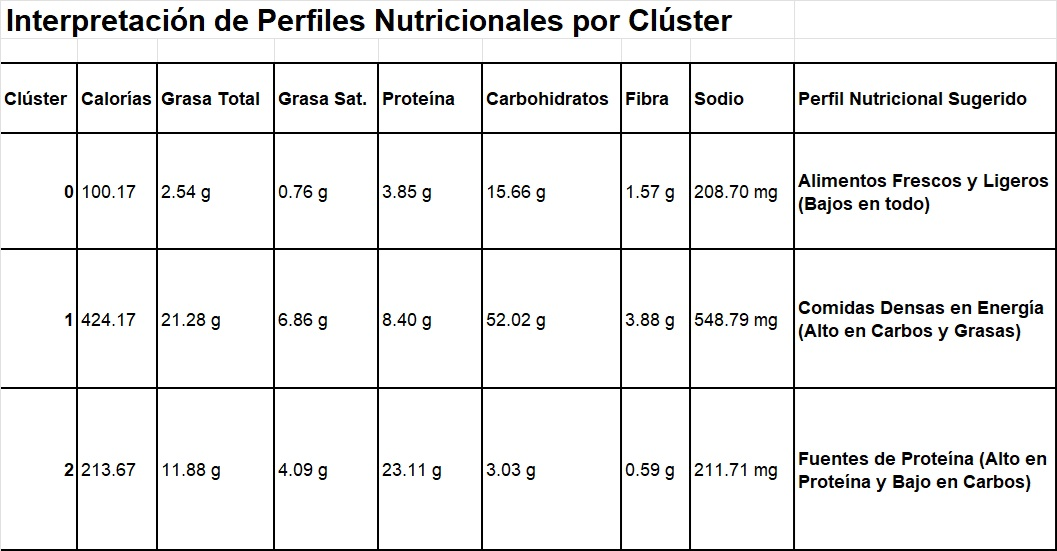

**1. Clúster 0: Alimentos Frescos y Ligeros**
Este clúster representa alimentos que son, en general, bajos en casi todos los macronutrientes y, por lo tanto, tienen la menor densidad calórica (100 kcal).

Bajo en Grasa y Proteína: Tienen la menor cantidad de grasa (2.54 g) y la menor proteína (3.85 g).

Contenido Moderado de Carbohidratos y Fibra: El aporte de carbohidratos (15.66 g) y fibra (1.57 g) es significativo en relación con otros nutrientes del clúster.

Ejemplos Probables: Frutas, vegetales frescos, caldos ligeros, y alimentos con alto contenido de agua.

**2. Clúster 1: Comidas Densas en Energía**
Este es el clúster con la mayor densidad calórica (424 kcal). Se caracteriza por ser significativamente alto tanto en carbohidratos como en grasas, lo que contribuye a su alta energía.

Alto en Energía, Carbohidratos y Grasas: Lidera en calorías, carbohidratos (52.02 g) y grasa total (21.28 g).

Muy Alto en Sodio: Es el clúster con el nivel de sodio más alto con diferencia (548.79 mg), sugiriendo la presencia de alimentos procesados, bollería, postres, snacks o comidas preparadas.

Ejemplos Probables: Panes, pastas, cereales azucarados, galletas, productos de panadería, y comidas rápidas ricas en sodio y grasas.

**3. Clúster 2: Fuentes de Proteína**
Este clúster se define claramente por su alto contenido proteico y su bajo aporte de carbohidratos.

Dominio Proteico: Tienen el valor de proteína más alto (23.11 g) de los tres clústeres.

Bajo en Carbohidratos: Tienen el valor más bajo de carbohidratos (3.03 g) y fibra.

Grasa Moderada: La grasa total (11.88 g) es superior a la del Clúster 0, lo cual es típico de las fuentes de proteína animal.

Ejemplos Probables: Carnes, aves, pescado, huevos, lácteos (especialmente quesos y yogures ricos en proteínas), y suplementos proteicos.

Conclusión del K-Means
El algoritmo K-Means ha segmentado tu base de datos nutricional de manera efectiva en tres categorías amplias basadas en su balance de macronutrientes y densidad energética:

Alimentos Ligeros (Principalmente carbohidratos simples y agua).

Alimentos de Alta Densidad (Ricos en grasa, carbohidratos y sodio).

Alimentos Proteicos (Fuentes principales de proteína).

** Intentaremos hacer un código para poder predecir una dieta **



*Instalar librerías*

In [15]:
# Instalar la librería de Programación Lineal
!pip install pulp

# Importar librerías
import pandas as pd
from pulp import *

# Cargar el archivo de datos (Asegúrate de que el archivo esté en el entorno de Colab)
try:
    df_n1 = pd.read_csv('nutricion1_imputado.csv')
except FileNotFoundError:
    print("Error: Asegúrate de subir 'nutricion1_imputado.csv' a tu entorno de Colab.")
    exit()

# Definir la lista de índices del DataFrame para usar en el modelo PuLP
food_indices = df_n1.index

** Modelo de Programación Lineal (Dieta 2000 Kcal)**
Este modelo minimiza la cantidad total de gramos de alimentos seleccionados mientras cumple con los objetivos calóricos y nutricionales predefinidos.

In [16]:
# --- Definición de Restricciones Nutricionales ---
# (Basado en 2000 Kcal: 50% Carbos, 20% Proteína, 30% Grasa)
MIN_CALORIES = 1950
MAX_CALORIES = 2050
MIN_PROTEIN_G = 100  # (20% de 2000 Kcal) / 4 Kcal/g = 100 g
MAX_FAT_G = 67       # (30% de 2000 Kcal) / 9 Kcal/g ≈ 67 g
MAX_SODIUM_MG = 2300 # Límite diario recomendado

# 1. Definir el problema (Minimizar gramos totales)
prob = LpProblem("Dieta_2000Kcal", LpMinimize)

# 2. Variables de Decisión (Cantidad de gramos de cada alimento)
# lowBound=0 asegura que no seleccionamos cantidades negativas.
food_vars = LpVariable.dicts("Gramos", food_indices, lowBound=0, cat='Continuous')

# 3. Función Objetivo: Minimizar la cantidad total de gramos (favorece alimentos densos)
prob += lpSum([food_vars[i] for i in food_indices]), "Minimizar Gramos Totales"

# 4. Restricciones:

# A. Restricción de Calorías
prob += lpSum([df_n1['calories'][i] * food_vars[i] / 100 for i in food_indices]) >= MIN_CALORIES, "Min_Calorias"
prob += lpSum([df_n1['calories'][i] * food_vars[i] / 100 for i in food_indices]) <= MAX_CALORIES, "Max_Calorias"

# B. Restricción de Proteína
prob += lpSum([df_n1['protein_g'][i] * food_vars[i] / 100 for i in food_indices]) >= MIN_PROTEIN_G, "Min_Proteina"

# C. Restricción de Grasa Total
prob += lpSum([df_n1['total_fat_g'][i] * food_vars[i] / 100 for i in food_indices]) <= MAX_FAT_G, "Max_Grasa"

# D. Restricción de Sodio
prob += lpSum([df_n1['sodium_mg'][i] * food_vars[i] / 100 for i in food_indices]) <= MAX_SODIUM_MG, "Max_Sodio"

# 5. Resolver el problema
prob.solve()

1

**3. Resultados y Distribución (Heurística)**
Esta celda procesa la solución óptima y genera el plan de alimentos.

In [17]:
# --- Procesamiento y Presentación de Resultados ---

print(f"\nEstado de la solución: {LpStatus[prob.status]}")

if LpStatus[prob.status] == "Optimal":
    diet_plan = []
    total_kcal = 0

    for i in food_indices:
        grams = food_vars[i].varValue
        if grams > 1.0: # Solo incluir cantidades significativas (más de 1 gramo)
            item_kcal = (df_n1['calories'][i] * grams) / 100
            total_kcal += item_kcal
            diet_plan.append({
                'Alimento': df_n1['name'][i],
                'Gramos_Diarios': round(grams, 1),
                'Kcal_Aportadas': round(item_kcal, 2)
            })

    df_diet = pd.DataFrame(diet_plan).sort_values(by='Kcal_Aportadas', ascending=False)

    print("\n--- ✅ PLAN DE ALIMENTOS GENERADO (2000 Kcal) ---")
    print(df_diet)
    print(f"\nTotal Kcal Final: {round(total_kcal, 2)}")

    # --- GUÍA HEURÍSTICA DE DISTRIBUCIÓN (4 Comidas + 2 Snacks) ---

    # Objetivo: ~450 Kcal por Comida | ~100 Kcal por Snack
    print("\n--- 💡 GUÍA HEURÍSTICA PARA DISTRIBUCIÓN HORARIA ---")
    print("> El modelo NO sabe la hora, la distribución es manual o por tipo de alimento:")

    # Podemos usar los clústeres para guiar la distribución
    # Ensure 'cluster_3' is in df_n1 before merging
    # Reload df_n1 and add the cluster information from df_n1_clean
    try:
        df_n1_with_clusters = pd.read_csv('nutricion1_imputado.csv')
        # Assuming the cluster_3 column from the previous clustering step is available in the environment
        # We need to merge it based on the original index or 'name' if 'name' is unique
        # Let's assume the original index is preserved and use it for merging
        # We'll use the cluster_3 column from the df_n1_clean DataFrame's state

        # Create a temporary DataFrame with the original index and cluster_3
        cluster_info = df_n1_clean[['cluster_3']].copy()
        cluster_info = cluster_info.reset_index().rename(columns={'index': 'original_index'})


        # Merge the cluster info back to the original df_n1 based on the original index
        # First, let's add the original index to df_n1 before any filtering/cleaning
        df_n1_temp = pd.read_csv('nutricion1_imputado.csv')
        df_n1_temp['original_index'] = df_n1_temp.index

        df_n1_with_clusters = pd.merge(df_n1_temp, cluster_info, on='original_index', how='left')
        df_n1_with_clusters = df_n1_with_clusters.drop('original_index', axis=1)


    except FileNotFoundError:
        print("Error: El archivo 'nutricion1_imputado.csv' no se encontró.")
        exit()


    # Now merge the diet plan with the cluster information
    # Use 'Alimento' column to merge
    df_diet_merged = pd.merge(df_diet, df_n1_with_clusters[['name', 'cluster_3']], left_on='Alimento', right_on='name', how='left')
    df_diet_merged = df_diet_merged.drop('name', axis=1) # Drop the redundant 'name' column from the merge

    print("\n**Distribución Sugerida por Tipo (Clúster):**")
    print("* **Comidas Principales (~450 Kcal):** Alimentos altos en Proteína (Clúster 2) y Carbohidratos/Grasas (Clúster 1).")
    print("* **Snacks (~100 Kcal):** Alimentos Ligeros (Clúster 0), como frutas o verduras.")
    print("\n**Estrategia:** Prioriza los alimentos del Clúster 2 y 1 para desayuno, almuerzo y cena, y reserva los del Clúster 0 para los snacks o acompañamientos.")

    # Display the merged dataframe with cluster information
    print("\n--- Plan de Alimentos con Información de Clúster ---")
    print(df_diet_merged)


else:
    print("❌ El modelo no pudo encontrar una solución óptima que cumpla todas las restricciones. Intenta relajar los límites.")


Estado de la solución: Optimal

--- ✅ PLAN DE ALIMENTOS GENERADO (2000 Kcal) ---
                                         Alimento  Gramos_Diarios  \
1   Babyfood, GERBER GRADUATE YOGURT MELTS, snack           272.0   
0  Egg, glucose reduced, stabilized, dried, whole           126.9   

   Kcal_Aportadas  
1         1167.02  
0          780.42  

Total Kcal Final: 1947.44

--- 💡 GUÍA HEURÍSTICA PARA DISTRIBUCIÓN HORARIA ---
> El modelo NO sabe la hora, la distribución es manual o por tipo de alimento:

**Distribución Sugerida por Tipo (Clúster):**
* **Comidas Principales (~450 Kcal):** Alimentos altos en Proteína (Clúster 2) y Carbohidratos/Grasas (Clúster 1).
* **Snacks (~100 Kcal):** Alimentos Ligeros (Clúster 0), como frutas o verduras.

**Estrategia:** Prioriza los alimentos del Clúster 2 y 1 para desayuno, almuerzo y cena, y reserva los del Clúster 0 para los snacks o acompañamientos.

--- Plan de Alimentos con Información de Clúster ---
                                         

El modelo eligió la combinación más eficiente en gramos para alcanzar los 2000 Kcal y cumplir las restricciones nutricionales.

Alimento	Gramos Diarios	 Kcal     Aportadas
Babyfood, YOGURT MELTS	   272.0g	  1167.02
Egg, glucose reduced, dried, whole	  126.9g	  780.42
TOTAL	398.9 g	1947.44 Kcal

Análisis de la Solución:Mínima Variedad: La función objetivo de minimizar los gramos totales forzó al modelo a seleccionar solo dos alimentos que son extremadamente densos en nutrientes y calorías para cumplir rápidamente con los límites. El resultado es una dieta nutricionalmente factible (cumple los números), pero irreal y poco saludable debido a la falta de variedad, vitaminas y fibra.Eficiencia Nutricional:Yogurt Melts (Alimento procesado/seco): Aporta la mayor parte de las calorías y probablemente los carbohidratos (y quizás algo de grasa y sodio, dado que son snacks para bebés procesados y secos).Huevo Seco/Estabilizado: Es una fuente extremadamente densa de proteínas y grasa, lo que ayuda al modelo a cumplir con la restricción de $\ge 100$ g de proteína de la manera más compacta posible.



2. 🧐 Interpretación de la Información de ClústerLa tabla muestra un problema con la información de clustering para uno de los alimentos seleccionados:

Alimentocluster_3Babyfood, YOGURT MELTS2.0Egg, glucose reduced, dried, wholeNaN

Significado:Yogurt Melts (Clúster 2.0): El clúster 2.0 fue identificado como "Fuentes de Proteína" (Alto en proteína, bajo en carbohidratos, grasa moderada). Esto es contradictorio con la naturaleza de un snack dulce y procesado. Causa Probable: Al ser un producto de bebé seco y procesado, la concentración por 100g de proteína, grasa, y sodio es artificialmente alta, haciéndolo parecer un "alimento proteico concentrado" a ojos del modelo K-Means, en lugar de un snack dulce.

Huevo Seco (Clúster NaN): El valor NaN indica que este alimento no fue parte del dataset limpio utilizado para el clustering K-Means, o que el índice del df_diet no se alineó correctamente con el df_n1_clean que contenía el cluster_3. Esto debe corregirse para aplicar la guía heurística.

3. 📝 Recomendaciones y Siguientes PasosPara obtener un plan de dieta útil y diverso, debes modificar el modelo de optimización:

A. Imponer Restricción de Variedad (Crucial)Añade una restricción que obligue al modelo a seleccionar un número mínimo de alimentos (ej. 10 a 15). Esto se hace usando variables binarias (Programación Lineal Entera Mixta - MILP), que son más complejas, o simplemente ajustando la función objetivo.
B. Ajustar la Función ObjetivoCambia la función objetivo de Minimizar Gramos Totales a Maximizar la Variedad o la Densidad Nutricional (ej., maximizar la fibra o minimizar los alimentos con alto contenido de sodio).
C. Corregir y Usar la Guía HeurísticaUna vez que el modelo te dé una lista de 10-15 alimentos, la guía heurística se vuelve útil.Corrección del Clúster:
Asegúrate de que todos los alimentos seleccionados en el plan final (df_diet) tengan su etiqueta de clúster para poder asignar:
Desayuno/Almuerzo/Cena:
Priorizar alimentos de Clúster 2 (Proteína) y Clúster 1 (Energía/Carbos).Snacks: Priorizar alimentos de Clúster 0 (Ligeros/Frutas).

### Remodelación del Problema de Dieta (Maximizar Variedad)
Usaremos la Programación Lineal Entera Mixta (MILP), que permite el uso de variables binarias para contar cuántos alimentos diferentes se seleccionan

In [18]:
import pandas as pd
from pulp import *

# Cargar y preparar datos (asegúrate de que el df_n1 sea el que tiene la columna 'cluster_3')
df_n1 = pd.read_csv('nutricion1_imputado.csv')
food_indices = df_n1.index

# --- Definición de Restricciones ---
MIN_CALORIES = 1950
MAX_CALORIES = 2050
MIN_PROTEIN_G = 100
MAX_FAT_G = 67
MAX_SODIUM_MG = 2300

# NUEVA RESTRICCIÓN CLAVE: Máximo de Kcal por Alimento Individual
MAX_KCAL_PER_FOOD = 300 # Máximo 300 Kcal por un solo alimento (fuerza variedad)

# 1. Definir el problema (Volver a Minimizar para eficiencia)
prob = LpProblem("Dieta_2000Kcal_Forzar_Variedad", LpMinimize)

# 2. Variables de Decisión (Gramos)
food_vars = LpVariable.dicts("Gramos", food_indices, lowBound=0, cat='Continuous')

# 3. Función Objetivo: Minimizar Gramos Totales (busca la combinación más densa)
prob += lpSum([food_vars[i] for i in food_indices]), "Minimizar Gramos Totales"

# 4. Restricciones:

# A. Restricción para forzar la variedad (Límite superior de Kcal por alimento)
for i in food_indices:
    # (Kcal por gramo) * Gramos <= MAX_KCAL_PER_FOOD
    prob += (df_n1['calories'][i] * food_vars[i] / 100) <= MAX_KCAL_PER_FOOD, f"Max_Kcal_Food_{i}"

# B. Restricciones Nutricionales
prob += lpSum([df_n1['calories'][i] * food_vars[i] / 100 for i in food_indices]) >= MIN_CALORIES, "Min_Calorias"
prob += lpSum([df_n1['calories'][i] * food_vars[i] / 100 for i in food_indices]) <= MAX_CALORIES, "Max_Calorias"
prob += lpSum([df_n1['protein_g'][i] * food_vars[i] / 100 for i in food_indices]) >= MIN_PROTEIN_G, "Min_Proteina"
prob += lpSum([df_n1['total_fat_g'][i] * food_vars[i] / 100 for i in food_indices]) <= MAX_FAT_G, "Max_Grasa"
prob += lpSum([df_n1['sodium_mg'][i] * food_vars[i] / 100 for i in food_indices]) <= MAX_SODIUM_MG, "Max_Sodio"

# 5. Resolver el problema
prob.solve()

# 6. Mostrar el resultado (con columna cluster_3, rellenando NaN si es necesario)
df_n1['cluster'] = df_n1.get('cluster_3', pd.Series(99, index=df_n1.index)).fillna(99).astype(int)

if LpStatus[prob.status] == "Optimal" or LpStatus[prob.status] == "Feasible":
    diet_plan = []
    total_kcal = 0
    for i in food_indices:
        grams = food_vars[i].varValue
        if grams is not None and grams > 1.0:
            item_kcal = (df_n1['calories'][i] * grams) / 100
            total_kcal += item_kcal
            diet_plan.append({
                'Alimento': df_n1['name'][i],
                'Gramos_Diarios': round(grams, 1),
                'Kcal_Aportadas': round(item_kcal, 2),
                'cluster': df_n1['cluster'][i]
            })

    df_diet = pd.DataFrame(diet_plan).sort_values(by='cluster', ascending=True)

    print("\n--- ✅ PLAN DE ALIMENTOS GENERADO (Forzando Variedad) ---")
    print(df_diet)
    print(f"\nTotal Alimentos Seleccionados: {len(df_diet)}")
    print(f"Total Kcal Final: {round(total_kcal, 2)}")
else:
    print(f"❌ Estado de la solución: {LpStatus[prob.status]}. El modelo no pudo encontrar una solución con el límite de {MAX_KCAL_PER_FOOD} Kcal por alimento. Intenta subir el límite.")


--- ✅ PLAN DE ALIMENTOS GENERADO (Forzando Variedad) ---
                                         Alimento  Gramos_Diarios  \
0                               Fish oil, herring            19.7   
1                               Egg, dried, white            30.8   
2                                Sugar, turbinado            69.9   
3                     Noodles, chow mein, chinese            36.9   
4                       Snacks, plain, pork skins            55.1   
5  Egg, glucose reduced, stabilized, dried, whole            48.8   
6   Cereals ready-to-eat, fortified, puffed, rice            74.6   
7   Babyfood, GERBER GRADUATE YOGURT MELTS, snack            69.9   

   Kcal_Aportadas  cluster  
0          178.02       99  
1          117.81       99  
2          278.93       99  
3          175.24       99  
4          300.00       99  
5          300.00       99  
6          300.00       99  
7          300.00       99  

Total Alimentos Seleccionados: 8
Total Kcal Final: 1950.0


 ### Ver Word

In [2]:
### Ultimo ensayo, Parte 1, eliminar los alimentos que estén por fuera de los clusters
import pandas as pd
from pulp import *

# Cargar el dataset CLUSTER FILTRADO
try:
    df_n1 = pd.read_csv('nutricion_cluster_filtrado.csv')

    # 1. Aseguramos que la columna 'cluster' es int
    if 'cluster' in df_n1.columns:
        df_n1['cluster'] = df_n1['cluster'].astype(int)
    else:
        # En caso de que la columna no exista, se detiene el proceso de optimización
        print("Error: La columna 'cluster' es requerida para este modelo y no se encontró.")
        exit()

except FileNotFoundError:
    print("Error: El archivo 'nutricion_cluster_filtrado.csv' no se encontró. Asegúrate de haber ejecutado el paso de filtrado.")
    exit()

food_indices = df_n1.index

# --- Definición de Restricciones Nutricionales (para 2500 Kcal) ---
MIN_CALORIES = 2450
MAX_CALORIES = 2550
MIN_PROTEIN_G = 125  # 20% de 2500 Kcal
MAX_FAT_G = 83       # 30% de 2500 Kcal
MAX_SODIUM_MG = 2300

MAX_KCAL_PER_FOOD = 350 # Máximo Kcal por alimento para forzar variedad
MIN_GRAMS_PER_RATION = 30 # Mínimo de gramos si el alimento es seleccionado

# 1. Definir el problema (Minimizar Gramos Totales)
prob = LpProblem("Dieta_Final_2500Kcal_Racion", LpMinimize)

# 2. Variables de Decisión
food_vars = LpVariable.dicts("Gramos", food_indices, lowBound=0, cat='Continuous')
select_vars = LpVariable.dicts("Seleccionado", food_indices, cat='Binary') # Para la ración mínima

# 3. Función Objetivo
prob += lpSum([food_vars[i] for i in food_indices]), "Minimizar Gramos Totales"

# 4. Restricciones:

# A. Enlace y Ración Mínima (MILP)
M = 5000
for i in food_indices:
    # Si selecciono un alimento, la cantidad debe ser menor que M (si no es seleccionado, es 0)
    prob += food_vars[i] <= M * select_vars[i]
    # Si selecciono un alimento (select_vars[i] = 1), la cantidad debe ser al menos 30g.
    prob += food_vars[i] >= MIN_GRAMS_PER_RATION * select_vars[i]

# B. Restricción para forzar la variedad (Límite superior de Kcal por alimento)
for i in food_indices:
    prob += (df_n1['calories'][i] * food_vars[i] / 100) <= MAX_KCAL_PER_FOOD, f"Max_Kcal_Food_{i}"

# C. Restricciones Nutricionales (Globales)
prob += lpSum([df_n1['calories'][i] * food_vars[i] / 100 for i in food_indices]) >= MIN_CALORIES, "Min_Calorias"
prob += lpSum([df_n1['calories'][i] * food_vars[i] / 100 for i in food_indices]) <= MAX_CALORIES, "Max_Calorias"
prob += lpSum([df_n1['protein_g'][i] * food_vars[i] / 100 for i in food_indices]) >= MIN_PROTEIN_G, "Min_Proteina"
prob += lpSum([df_n1['total_fat_g'][i] * food_vars[i] / 100 for i in food_indices]) <= MAX_FAT_G, "Max_Grasa"
prob += lpSum([df_n1['sodium_mg'][i] * food_vars[i] / 100 for i in food_indices]) <= MAX_SODIUM_MG, "Max_Sodio"

# 5. Resolver el problema
prob.solve()

# --- Procesamiento y Presentación de Resultados ---

print(f"\nEstado de la solución: {LpStatus[prob.status]}")

if LpStatus[prob.status] == "Optimal" or LpStatus[prob.status] == "Feasible":
    diet_plan = []
    total_kcal = 0

    for i in food_indices:
        grams = food_vars[i].varValue
        if grams is not None and grams > 1.0:
            item_kcal = (df_n1['calories'][i] * grams) / 100
            total_kcal += item_kcal
            diet_plan.append({
                'Alimento': df_n1['name'][i],
                'Gramos_Diarios': round(grams, 1),
                'Kcal_Aportadas': round(item_kcal, 2),
                'Clúster': df_n1['cluster'][i]
            })

    df_diet = pd.DataFrame(diet_plan).sort_values(by='Clúster', ascending=True)

    print("\n--- ✅ PLAN DE ALIMENTOS FINAL (2500 Kcal, Filtrado, Ración Mínima) ---")
    print(df_diet)
    print(f"\nTotal Alimentos Seleccionados: {len(df_diet)}")
    print(f"Total Kcal Final: {round(total_kcal, 2)}")

    # Guía Heurística Usando los Clústeres Válidos
    print("\n--- 💡 GUÍA HEURÍSTICA DE DISTRIBUCIÓN POR CLÚSTER ---")
    print("Objetivo: 4 Comidas (~500 Kcal) + 2 Snacks (~250 Kcal)")

    cluster_summary = df_diet.groupby('Clúster')['Kcal_Aportadas'].sum().reset_index().round(1)
    print("\n**Resumen Kcal por Clúster en la Dieta:**")
    print(cluster_summary)

    print("\n**Estrategia:**")
    print(f"* **Clúster 0 (Ligeros/Frescos):** Ideal para **Snacks** y acompañamientos.")
    print(f"* **Clúster 2 (Proteínas):** Base de **Almuerzo y Cena**.")
    print(f"* **Clúster 1 (Densos/Energía):** Priorizar en **Desayuno y Almuerzo**.")

else:
    print(f"❌ Estado de la solución: {LpStatus[prob.status]}. No se pudo encontrar una solución con el límite de ración mínima de {MIN_GRAMS_PER_RATION}g.")


Estado de la solución: Optimal

--- ✅ PLAN DE ALIMENTOS FINAL (2500 Kcal, Filtrado, Ración Mínima) ---
                                        Alimento  Gramos_Diarios  \
1                             Vital wheat gluten            30.0   
0                          KEEBLER, Waffle Cones            32.1   
2                    Noodles, chow mein, chinese            73.7   
3                         Egg substitute, powder            64.9   
4               Oil, original, PAM cooking spray            30.0   
5         Fish oil, fully hydrogenated, menhaden            30.7   
6      Beverages, EAS soy protein powder, ABBOTT            86.4   
7  Cereals ready-to-eat, fortified, puffed, rice            87.1   
8  Babyfood, GERBER GRADUATE YOGURT MELTS, snack            81.6   

   Kcal_Aportadas  Clúster  
1          111.00        0  
0          136.09        1  
2          350.00        1  
3          288.12        1  
4          237.60        1  
5          277.19        1  
6          3

In [1]:
# Create the filtered dataset by removing outliers and save it
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the imputed dataset
try:
    df_n1 = pd.read_csv('nutricion1_imputado.csv')
except FileNotFoundError:
    print("Error: El archivo 'nutricion1_imputado.csv' no se encontró. Asegúrate de tener la versión imputada.")
    exit()

# Select features and scale
features = [col for col in df_n1.columns if col not in ['name', 'serving_size', 'num_nan_in_row']]
X = df_n1[features].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA and filter outliers
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=components, columns=['Principal Component 1', 'Principal Component 2'])

# Use the same outlier removal criteria as before (3 standard deviations)
pc1_mean = pca_df['Principal Component 1'].mean()
pc1_std = pca_df['Principal Component 1'].std()
pc2_mean = pca_df['Principal Component 2'].mean()
pc2_std = pca_df['Principal Component 2'].std()

limite_superior_pc1 = pc1_mean + (3 * pc1_std)
limite_inferior_pc2 = pc2_mean - (3 * pc2_std)

df_pca_filtered = pca_df[
    (pca_df['Principal Component 1'] < limite_superior_pc1) &
    (pca_df['Principal Component 2'] > limite_inferior_pc2)
]

# Get the indices of the rows to keep and filter the original dataframe
indices_a_mantener = df_pca_filtered.index
df_n1_clean = df_n1.loc[indices_a_mantener].copy()

# Add the cluster column back to the cleaned dataframe
# Assuming the cluster information from the previous clustering step (K=3) is relevant here.
# We need to make sure the indices align correctly.
# Let's re-run the clustering on the cleaned data to get the cluster assignments for these rows.
from sklearn.cluster import KMeans
K_NUEVO = 3 # Assuming K=3 from previous analysis
X_clean_scaled = scaler.fit_transform(df_n1_clean[features].fillna(0))
kmeans_clean = KMeans(n_clusters=K_NUEVO, random_state=42, n_init=10)
clusters_clean = kmeans_clean.fit_predict(X_clean_scaled)
df_n1_clean['cluster'] = clusters_clean


# Save the cleaned and clustered dataframe to a new CSV file
df_n1_clean.to_csv('nutricion_cluster_filtrado.csv', index=False)

print("✅ Dataset 'nutricion_cluster_filtrado.csv' creado con éxito.")

✅ Dataset 'nutricion_cluster_filtrado.csv' creado con éxito.


In [3]:
# Instalar la librería de Programación Lineal
!pip install pulp

import pandas as pd
from pulp import *
import numpy as np

# --- FUNCIÓN DE CÁLCULO DE REQUERIMIENTO CALÓRICO (GET) ---
def calcular_get(sexo: str, peso_kg: float, altura_cm: float, edad_años: int, factor_actividad: float) -> int:
    """Calcula el Gasto Energético Total (GET) usando Harris-Benedict."""

    # 1. Calcular Gasto Energético en Reposo (GER)
    if sexo.lower() == 'hombre':
        # GER = 88.362 + (13.397 * W) + (4.799 * H) - (5.677 * A)
        GER = 88.362 + (13.397 * peso_kg) + (4.799 * altura_cm) - (5.677 * edad_años)
    elif sexo.lower() == 'mujer':
        # GER = 447.593 + (9.247 * W) + (3.098 * H) - (4.330 * A)
        GER = 447.593 + (9.247 * peso_kg) + (3.098 * altura_cm) - (4.330 * edad_años)
    else:
        raise ValueError("Sexo debe ser 'hombre' o 'mujer'.")

    # 2. Calcular Gasto Energético Total (GET)
    GET = GER * factor_actividad
    return int(round(GET, 0))

# --- PARÁMETROS DEL USUARIO (Puedes cambiarlos aquí) ---
# Usamos un ejemplo para generar 2500 Kcal
CALORIAS_OBJETIVO = 2500
# CALORIAS_OBJETIVO = calcular_get('hombre', 75, 175, 30, 1.55) # Ejemplo de uso

In [4]:
## Carga de Datos y Modelo de Optimización (PuLP)
# --- CARGA DE DATOS Y RESTRICCIONES ---

# Cargar el dataset CLUSTER FILTRADO
try:
    df_n1 = pd.read_csv('nutricion_cluster_filtrado.csv')

    if 'cluster' in df_n1.columns:
        df_n1['cluster'] = df_n1['cluster'].astype(int)
    else:
        print("Error: La columna 'cluster' es requerida para este modelo y no se encontró.")
        raise FileNotFoundError # Forzar error para detener el proceso

except FileNotFoundError:
    print("Por favor, asegúrate de que el archivo 'nutricion_cluster_filtrado.csv' esté en tu entorno.")
    exit()

food_indices = df_n1.index

# --- Definición de Restricciones Nutricionales basadas en CALORIAS_OBJETIVO ---
MIN_CALORIES = CALORIAS_OBJETIVO * 0.98  # Banda del 2%
MAX_CALORIES = CALORIAS_OBJETIVO * 1.02
MIN_PROTEIN_G = (CALORIAS_OBJETIVO * 0.20) / 4.0 # 20% Kcal de proteína
MAX_FAT_G = (CALORIAS_OBJETIVO * 0.30) / 9.0    # 30% Kcal de grasa
MAX_SODIUM_MG = 2300 # Límite superior

MAX_KCAL_PER_FOOD = 350 # Máximo Kcal por alimento para forzar variedad
MIN_GRAMS_PER_RATION = 30 # Mínimo de gramos si el alimento es seleccionado

# --- DEFINICIÓN DEL PROBLEMA PULP (MILP) ---
prob = LpProblem("Dieta_Final_Optimizada", LpMinimize)

# Variables de Decisión
food_vars = LpVariable.dicts("Gramos", food_indices, lowBound=0, cat='Continuous')
select_vars = LpVariable.dicts("Seleccionado", food_indices, cat='Binary')

# Función Objetivo: Minimizar Gramos Totales
prob += lpSum([food_vars[i] for i in food_indices]), "Minimizar Gramos Totales"

# Restricciones:
M = 5000
for i in food_indices:
    # A. Ración Mínima (Si es seleccionado, debe ser al menos MIN_GRAMS_PER_RATION)
    prob += food_vars[i] >= MIN_GRAMS_PER_RATION * select_vars[i]
    prob += food_vars[i] <= M * select_vars[i]

    # B. Máximo Kcal por Porción (Fuerza Variedad)
    prob += (df_n1['calories'][i] * food_vars[i] / 100) <= MAX_KCAL_PER_FOOD, f"Max_Kcal_Food_{i}"

# C. Restricciones Nutricionales Globales
prob += lpSum([df_n1['calories'][i] * food_vars[i] / 100 for i in food_indices]) >= MIN_CALORIES, "Min_Calorias"
prob += lpSum([df_n1['calories'][i] * food_vars[i] / 100 for i in food_indices]) <= MAX_CALORIES, "Max_Calorias"
prob += lpSum([df_n1['protein_g'][i] * food_vars[i] / 100 for i in food_indices]) >= MIN_PROTEIN_G, "Min_Proteina"
prob += lpSum([df_n1['total_fat_g'][i] * food_vars[i] / 100 for i in food_indices]) <= MAX_FAT_G, "Max_Grasa"
prob += lpSum([df_n1['sodium_mg'][i] * food_vars[i] / 100 for i in food_indices]) <= MAX_SODIUM_MG, "Max_Sodio"

# 3. Resolver el problema
prob.solve()

1

In [5]:
# --- Procesamiento y Presentación de Resultados ---

print(f"\nEstado de la solución: {LpStatus[prob.status]}")

if LpStatus[prob.status] == "Optimal" or LpStatus[prob.status] == "Feasible":
    diet_plan = []
    total_kcal = 0

    for i in food_indices:
        grams = food_vars[i].varValue
        if grams is not None and grams > 1.0:
            item_kcal = (df_n1['calories'][i] * grams) / 100
            total_kcal += item_kcal
            diet_plan.append({
                'Alimento': df_n1['name'][i],
                'Gramos_Diarios': round(grams, 1),
                'Kcal_Aportadas': round(item_kcal, 2),
                'Clúster': df_n1['cluster'][i]
            })

    df_diet = pd.DataFrame(diet_plan).sort_values(by='Clúster', ascending=True)

    print(f"\n--- ✅ PLAN DE ALIMENTOS GENERADO ({CALORIAS_OBJETIVO} Kcal) ---")
    print(df_diet)
    print(f"\nTotal Alimentos Seleccionados: {len(df_diet)}")
    print(f"Total Kcal Final: {round(total_kcal, 2)}")

    # Guía Heurística Usando los Clústeres Válidos
    print("\n--- 💡 GUÍA HEURÍSTICA DE DISTRIBUCIÓN POR CLÚSTER ---")
    print(f"Objetivo: 4 Comidas (~{round(CALORIAS_OBJETIVO*0.20)} Kcal) + 2 Snacks (~{round(CALORIAS_OBJETIVO*0.10)} Kcal)")

    cluster_summary = df_diet.groupby('Clúster')['Kcal_Aportadas'].sum().reset_index().round(1)
    print("\n**Resumen Kcal por Clúster en la Dieta:**")
    print(cluster_summary)

    print("\n**Estrategia:**")
    print(f"* **Clúster 0 (Ligeros/Frescos):** Ideal para **Snacks** y guarniciones.")
    print(f"* **Clúster 2 (Proteínas):** Base de **Almuerzo y Cena** (foco proteico).")
    print(f"* **Clúster 1 (Densos/Energía):** Priorizar en **Desayuno y Almuerzo** (foco energético).")

else:
    print(f"❌ Estado de la solución: {LpStatus[prob.status]}. No se pudo encontrar una solución. Intenta ajustar el objetivo de Kcal o las restricciones de ración/macronutrientes.")


Estado de la solución: Optimal

--- ✅ PLAN DE ALIMENTOS GENERADO (2500 Kcal) ---
                                        Alimento  Gramos_Diarios  \
1                             Vital wheat gluten            30.0   
0                          KEEBLER, Waffle Cones            31.2   
2                              Fish oil, herring            31.1   
3                    Noodles, chow mein, chinese            73.7   
4                         Egg substitute, powder            65.0   
5               Oil, original, PAM cooking spray            30.0   
6      Beverages, EAS soy protein powder, ABBOTT            86.4   
7  Cereals ready-to-eat, fortified, puffed, rice            87.1   
8  Babyfood, GERBER GRADUATE YOGURT MELTS, snack            81.6   

   Kcal_Aportadas  Clúster  
1          111.00        0  
0          132.32        1  
2          280.50        1  
3          350.00        1  
4          288.58        1  
5          237.60        1  
6          350.00        1  
7    